# Import Modules

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from scipy import ndimage, fft

# Transformasi Fourier

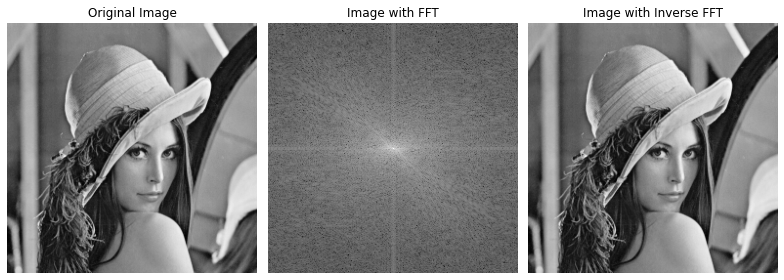

In [2]:
lena_gray = plt.imread("../test_images/lena_gray.bmp")

# Fourier Transform
lena_with_fourier_transform = fft.fft2(lena_gray)
lena_with_fourier_transform_shift = fft.fftshift(lena_with_fourier_transform)
lena_with_abs = np.abs(lena_with_fourier_transform_shift)
lena_with_log = np.log(lena_with_abs + 1)

# Inverse Fourier Transform
lena_with_inv_fourier_transform = fft.ifft2(lena_with_fourier_transform).real

# Plotting
fig, ax = plt.subplots(nrows=1, ncols=3, tight_layout=True, figsize=(11, 11))

ax[0].set_title("Original Image")
ax[0].axis("off")
ax[0].imshow(lena_gray, plt.cm.gray)

ax[1].set_title("Image with FFT")
ax[1].axis("off")
ax[1].imshow(lena_with_log, plt.cm.gray)

ax[2].set_title("Image with Inverse FFT")
ax[2].axis("off")
ax[2].imshow(lena_with_inv_fourier_transform, plt.cm.gray);

# Menghilangkan Derau dengan FFT

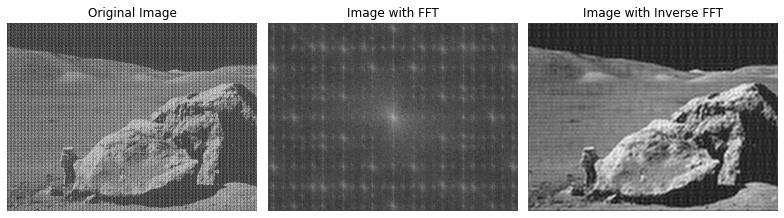

In [3]:
moon_landing = plt.imread("../test_images/moonlanding.png")

# Fourier Transform
lena_with_fourier_transform = fft.fft2(moon_landing)
lena_with_fourier_transform_shift = fft.fftshift(lena_with_fourier_transform)
lena_with_abs = np.abs(lena_with_fourier_transform_shift)
lena_with_log = np.log(lena_with_abs + 1)

# Define the fraction of coefficients (in each direction) we keep
keep_fraction = 0.1

# Call ff a copy of the original transform. Numpy arrays have a copy
# method for this purpose.
im_fft2 = lena_with_fourier_transform.copy()

# Set r and c to be the number of rows and columns of the array.
r, c = im_fft2.shape

# Set to zero all rows with indices between r*keep_fraction and
# r*(1-keep_fraction):
im_fft2[int(r*keep_fraction):int(r*(1-keep_fraction))] = 0

# Similarly with the columns:
im_fft2[:, int(c*keep_fraction):int(c*(1-keep_fraction))] = 0

# Plotting
fig, ax = plt.subplots(nrows=1, ncols=3, tight_layout=True, figsize=(11, 11))

ax[0].set_title("Original Image")
ax[0].axis("off")
ax[0].imshow(moon_landing, plt.cm.gray)

ax[1].set_title("Image with FFT")
ax[1].axis("off")
ax[1].imshow(lena_with_log, plt.cm.gray)

ax[2].set_title("Image with Inverse FFT")
ax[2].axis("off")
ax[2].imshow(fft.ifft2(im_fft2).real, plt.cm.gray);

# Discrete Cosine Transform

<IPython.core.display.Javascript object>


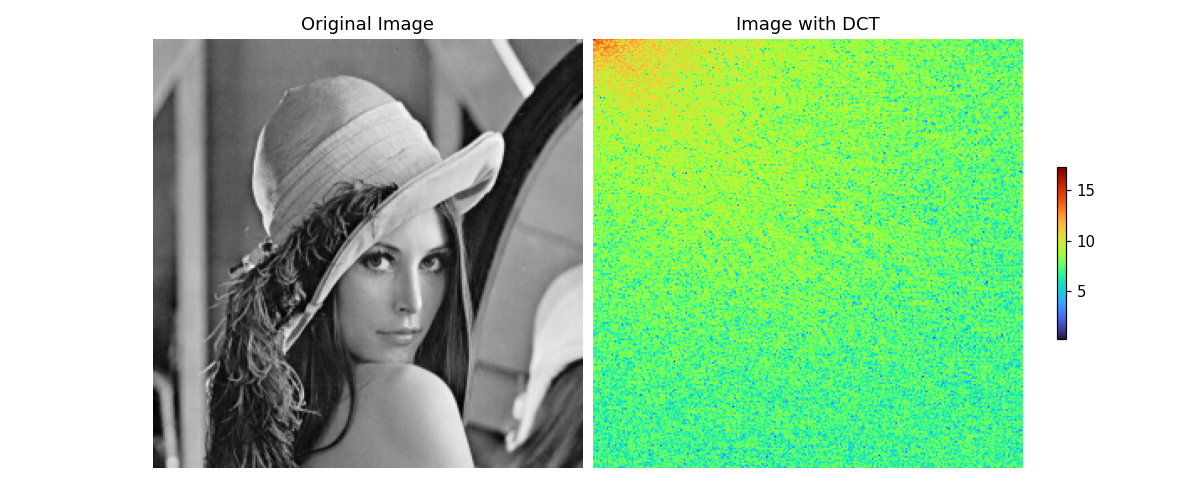

In [109]:
%matplotlib notebook
lena_gray = plt.imread("../test_images/lena_gray.bmp")
lena_with_dct = np.log(np.abs(fft.dctn(lena_gray)) + 1)

fig, ax = plt.subplots(nrows=1, ncols=2, tight_layout=True, figsize=(10, 10))

ax[0].set_title("Original Image")
ax[0].axis("off")
ax[0].imshow(lena_gray, plt.cm.gray)

ax[1].set_title("Image with DCT")
ax[1].axis("off")
pcm = ax[1].imshow(lena_with_dct, cmap=plt.cm.turbo)
fig.colorbar(pcm, ax=ax[1], shrink=0.4);